<a href="https://colab.research.google.com/github/YuanChenhang/USAAIO/blob/main/PyTorch_Modules_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

In [ ]:
import torch
import torch.nn as nn

# **Basics**

In PyTorch, a building block holds

* **Learnable tensors**. Examples: weights, biases.

* **Non-learnable tensors**. Examples: mean and variance for normalization.

* **Forward computation logic** (how inputs are transformed).

* **Training and evaluation modes** that may be associated with different forward computation logics.



**Syntax of a module class:**

```
class Module_Name(nn.Module):
    def __init__(self, arg0, arg1, ...):
        super().__init__()
        ...

    def forward(self, x):
        ...
        return ...
```

**Example: Define a linear module from scratch**

* Always includes ```bias```

In [ ]:
class MyLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        # Method 1 of defining learnable parameters
        self.weight = nn.Parameter(torch.randn(out_features, in_features))

        # Method 2 of defining learnable parameters
        self.register_parameter('bias', nn.Parameter(torch.randn(out_features)))

    def forward(self, x):
        return x @ self.weight.T + self.bias

**Initialize a model**

In [ ]:
model_linear = MyLinear(3, 5)

**Forward computation**

In `nn.Module`, method `__call__` calls `forward`. So there is no need to enter `forward` while calling it.

In [ ]:
num_samples = 10
x = torch.randn(num_samples, 3)

y1 = model_linear(x)
y2 = model_linear.forward(x)

print(torch.max(torch.abs(y1 - y2)).item())

0.0


# **Properties of data type ```torch.nn.parameter.Parameter```**

* Special class of tensors (subclass of tensors with special properties)
* Constructed by using `nn.Parameter(tensor)`
* By default, ```requires_grad = True``` (that is, **learnable parameters**)
* Included in ```model.parameters()```
* Included in ```state_dict()``` for saving and loading model states
* When a model is sent to a device, all data with this type are moved to this device

In [ ]:
# Retrieve parameters
print(model_linear.weight)
print(model_linear.bias)

print(type(model_linear.weight))
print(type(model_linear.bias))

Parameter containing:
tensor([[-0.4574, -0.8987,  1.4610],
        [-2.0705, -0.9420,  0.7885],
        [-0.6868, -0.2368,  0.4693],
        [-1.3037,  0.2614, -1.5674],
        [ 0.7792, -1.3836, -0.6739]], requires_grad=True)
Parameter containing:
tensor([-0.7621, -1.0360, -0.0309, -0.5044, -0.0719], requires_grad=True)
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>


In [ ]:
# Iterate over parameters
for param in model_linear.parameters():
    print(param)
    print(type(param))
    print(param.shape)
    print(param.requires_grad)
    print(param.dtype)

Parameter containing:
tensor([[-0.4574, -0.8987,  1.4610],
        [-2.0705, -0.9420,  0.7885],
        [-0.6868, -0.2368,  0.4693],
        [-1.3037,  0.2614, -1.5674],
        [ 0.7792, -1.3836, -0.6739]], requires_grad=True)
<class 'torch.nn.parameter.Parameter'>
torch.Size([5, 3])
True
torch.float32
Parameter containing:
tensor([-0.7621, -1.0360, -0.0309, -0.5044, -0.0719], requires_grad=True)
<class 'torch.nn.parameter.Parameter'>
torch.Size([5])
True
torch.float32


In [ ]:
# Iterate over names and parameters
for name, param in model_linear.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[-0.4574, -0.8987,  1.4610],
        [-2.0705, -0.9420,  0.7885],
        [-0.6868, -0.2368,  0.4693],
        [-1.3037,  0.2614, -1.5674],
        [ 0.7792, -1.3836, -0.6739]], requires_grad=True)
bias Parameter containing:
tensor([-0.7621, -1.0360, -0.0309, -0.5044, -0.0719], requires_grad=True)


In [ ]:
# Convert iterable .parameters() to a list

print(list(model_linear.parameters()))
print(list(model_linear.parameters())[0])
print(list(model_linear.parameters())[1])


[Parameter containing:
tensor([[-0.4574, -0.8987,  1.4610],
        [-2.0705, -0.9420,  0.7885],
        [-0.6868, -0.2368,  0.4693],
        [-1.3037,  0.2614, -1.5674],
        [ 0.7792, -1.3836, -0.6739]], requires_grad=True), Parameter containing:
tensor([-0.7621, -1.0360, -0.0309, -0.5044, -0.0719], requires_grad=True)]
Parameter containing:
tensor([[-0.4574, -0.8987,  1.4610],
        [-2.0705, -0.9420,  0.7885],
        [-0.6868, -0.2368,  0.4693],
        [-1.3037,  0.2614, -1.5674],
        [ 0.7792, -1.3836, -0.6739]], requires_grad=True)
Parameter containing:
tensor([-0.7621, -1.0360, -0.0309, -0.5044, -0.0719], requires_grad=True)


In [ ]:
# Convert iterable .named_parameters() to a list

print(list(model_linear.named_parameters()))
print(list(model_linear.named_parameters())[0])
print(list(model_linear.named_parameters())[1])

[('weight', Parameter containing:
tensor([[-0.4574, -0.8987,  1.4610],
        [-2.0705, -0.9420,  0.7885],
        [-0.6868, -0.2368,  0.4693],
        [-1.3037,  0.2614, -1.5674],
        [ 0.7792, -1.3836, -0.6739]], requires_grad=True)), ('bias', Parameter containing:
tensor([-0.7621, -1.0360, -0.0309, -0.5044, -0.0719], requires_grad=True))]
('weight', Parameter containing:
tensor([[-0.4574, -0.8987,  1.4610],
        [-2.0705, -0.9420,  0.7885],
        [-0.6868, -0.2368,  0.4693],
        [-1.3037,  0.2614, -1.5674],
        [ 0.7792, -1.3836, -0.6739]], requires_grad=True))
('bias', Parameter containing:
tensor([-0.7621, -1.0360, -0.0309, -0.5044, -0.0719], requires_grad=True))


**Arithmetic operations between torch.nn.parameter.Parameter and a tensor is a tensor, not torch.nn.parameter.Parameter**

In [ ]:
weight = nn.Parameter(torch.randn(5, 10))
print(type(weight))

x = torch.randn(3, 10)
print(type(x))

y = x @ weight.T
print(type(y))

y = nn.Parameter(y)
print(type(y))

<class 'torch.nn.parameter.Parameter'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>


**Attribute ```data``` in ```torch.nn.parameter.Parameter``` is a tensor with ```requires_grad = False```**

In [ ]:
print(model_linear.weight.data)
print(type(model_linear.weight.data))
print(model_linear.weight.data.requires_grad)

tensor([[-0.4574, -0.8987,  1.4610],
        [-2.0705, -0.9420,  0.7885],
        [-0.6868, -0.2368,  0.4693],
        [-1.3037,  0.2614, -1.5674],
        [ 0.7792, -1.3836, -0.6739]])
<class 'torch.Tensor'>
False


# **Module iterables/containers**

In [ ]:
# Iterate over modules
for module in model_linear.modules():
    print(module)

MyLinear()


In [ ]:
# Iterate over names and modules
for name, module in model_linear.named_modules():
    print(name)
    print(module)


MyLinear()


# **Exercise: Build a ReLU module from scratch**

$$
\text{ReLU} \left( x \right) = \max \left\{ x , 0 \right\} .
$$

In [ ]:
class MyReLU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return torch.maximum(x,torch.tensor(0))

In [ ]:
# Initialize the model

model_ReLU = MyReLU()

In [ ]:
# Forward computation

x = torch.randn(10)

y = model_ReLU(x)
print(y)

tensor([0.4190, 0.0000, 0.5270, 0.4912, 0.4729, 0.0000, 0.0000, 0.5781, 0.0000,
        1.1144])


In [ ]:
# Iterate over parameters

for name, param in model_ReLU.named_parameters():
    print(name, param)

In [ ]:
# Iterate over modules

for name, module in model_ReLU.named_modules():
    print(name, module)

 MyReLU()


# **Training and evaluation modes**

**Method 1:**

* `model.training = True` (default value)

* `model.training = False`

**Method 2:**

* `model.train()`: Set `model.training = True`

* `model.eval()`: Set `model.training = False`



**Example: Dropout model**

**Attribute:**

* Dropout probability `p`

**Training mode:**

* Each input entry $x$ is transformed to $x \cdot \frac{Z}{1 - p}$, where $Z = 1$ with probability $1-p$ and 0 with probability $p$

* Thus, $\text{E} \left[ x \right] = x$ and $\text{Var} \left[ x \right] = x^2 \cdot \frac{p}{1-p}$.

**Evaluation mode:**

* Identitity transformation (output is the same as the input).



In [ ]:
# Define my dropout model

class MyDropout(nn.Module):
    def __init__(self, p=0.5):
        super().__init__()
        self.p = p

    def forward(self, X):
        if self.training:
            no_drop = torch.rand(X.shape) > self.p
            return X * no_drop.float() / (1 - self.p)
        else:
            return X

In [ ]:
# Create a synthetic dataset

num_samples = 10
num_features = 5
X = torch.randn(num_samples, num_features)

prob_dropout = 0.3

In [ ]:
# Test my model

my_model = MyDropout(p = prob_dropout)
print(my_model.training)

my_model.train()
print(my_model.training)
X_dropped = my_model(X)
print(X_dropped / X)

my_model.eval()
print(my_model.training)
X_dropped = my_model(X)
print(X_dropped / X)

True
True
tensor([[1.4286, 1.4286, 1.4286, 0.0000, 1.4286],
        [0.0000, 0.0000, 0.0000, 1.4286, 1.4286],
        [1.4286, 0.0000, 1.4286, 1.4286, 1.4286],
        [1.4286, 1.4286, 1.4286, 0.0000, 0.0000],
        [1.4286, 1.4286, 1.4286, 1.4286, 0.0000],
        [1.4286, 0.0000, 1.4286, 1.4286, 1.4286],
        [1.4286, 0.0000, 1.4286, 0.0000, 0.0000],
        [0.0000, 1.4286, 0.0000, 0.0000, 1.4286],
        [0.0000, 1.4286, 1.4286, 0.0000, 0.0000],
        [1.4286, 1.4286, 1.4286, 1.4286, 1.4286]])
False
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


# **Non-learnable tensors (buffers)**

**Properties of buffers**

* Class is still `torch.Tensor`. However,  when a model is sent to a device, all data with this type are moved to this device
* Register as an attribute using `self.register_buffer(name, tensor)`
* By default, ```requires_grad = False``` (that is, **non-learnable parameters**)
* Included in ```model.buffers()```
* Included in ```state_dict()``` for saving and loading model states

**Example: 0-dim batch normalization**

**Hyperparameters:**

* Momentum $m \in \left( 0 , 1 \right)$

* $\epsilon$ (default value is $10^{-5}$)

**Evaluation mode:**

* Input: $X$ with shape `(N,1)`

* Output from the following element-wise operation

   $$
y = \frac{X - \mu}{\sqrt{\sigma^2 + \epsilon}} \gamma + \beta
   $$

* $\mu$ and $\sigma^2$

    * Buffers
    
    * Shapes: `(1,)`
    
    * Values are determined in the training mode

* $\gamma$ and $\beta$

    * Parameters
    
    * Shapes: `(1,)`
    
    * Values are learned in the training mode

**Training mode:**

* For each mini-batch with shape `(batch_size,)`, compute within-batch mean $\tilde \mu$ and variance $\tilde \sigma^2$.

* Update $\mu$ and $\sigma^2$ with the **moving average model**

   \begin{align*}
\mu & \leftarrow m \tilde \mu + \left( 1 - m \right) \mu \\
\sigma^2 & \leftarrow m \tilde \sigma^2 + \left( 1 - m \right) \sigma^2
   \end{align*}

* Update $\gamma$ and $\beta$ via learning (backpropagation and autograd).

In [ ]:
# Build the model

class MyBatchNorm(nn.Module):
    def __init__(self, momentum=0.1, eps=1e-5):
        super().__init__()
        self.momentum = momentum
        self.eps = eps

        # Buffers
        self.register_buffer('mean', torch.zeros(size = (1,)))
        self.register_buffer('var', torch.ones(size = (1,)))

        # Learnable parameters
        self.gamma = nn.Parameter(torch.ones(size = (1,)))
        self.beta = nn.Parameter(torch.zeros(size = (1,)))

    def forward(self, X):
        if self.training:
            self.mean = self.momentum * X.mean() + (1 - self.momentum) * self.mean
            self.var = self.momentum * X.var() + (1 - self.momentum) * self.var
        else:
            None

        return self.gamma * (X - self.mean) / torch.sqrt(self.var + self.eps) + self.beta


In [ ]:
# Instantiate a model
my_batch_norm = MyBatchNorm()


In [ ]:
# Explore the properties of buffers
print(type(my_batch_norm.mean))
print(my_batch_norm.mean.requires_grad)

<class 'torch.Tensor'>
False


In [ ]:
# Buffers containers

for buffer in my_batch_norm.buffers():
    print(buffer)

for name, buffer in my_batch_norm.named_buffers():
    print(name, buffer)

tensor([0.])
tensor([1.])
mean tensor([0.])
var tensor([1.])


**Training and evaluation**

In [ ]:
# Creata a synthetic dataset

train_size = 1000
test_size = 50

X_train = torch.randn(train_size,1)
X_test = torch.randn(test_size,1)

True


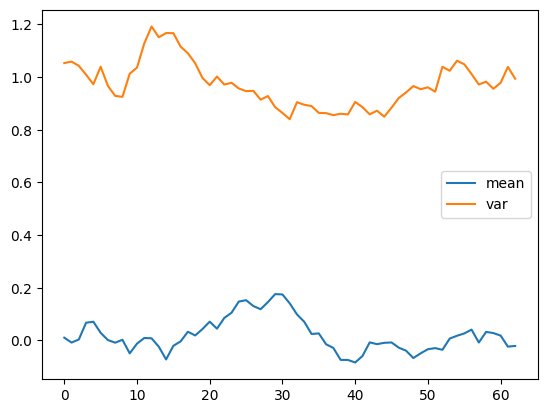

In [ ]:
# Train the model

batch_size = 16
num_batches = train_size // batch_size + (train_size % batch_size != 0)

mean_history = torch.empty(num_batches,1)
var_history = torch.empty(num_batches,1)

my_batch_norm.train()
print(my_batch_norm.training)

for idx in range(num_batches):
    my_batch_norm(X_train[idx * batch_size: (idx+1) * batch_size])
    mean_history[idx] = my_batch_norm.mean
    var_history[idx] = my_batch_norm.var

# Plot mean and var history
import matplotlib.pyplot as plt
plt.plot(mean_history, label = 'mean')
plt.plot(var_history, label = 'var')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model

my_batch_norm.eval()
print(my_batch_norm.training)
y_pred = my_batch_norm(X_test)


False


# **Save models**

**Save model weights (registered parameters and buffers)**

```
# Save model weights
torch.save(model.state_dict(), path)

# Load weights to a new model
new_model = Model() # Instantiate a new model
new_model.load_state_dict(torch.load(path))
```

Path extension:

* Any extension is OK. But `pth` is preferred.

In [ ]:
# Example

# Save a model
torch.save(my_batch_norm.state_dict(), 'my_batch_norm_weights.pth')

# Create a new model, and then load weights from the old model to the new one
new_my_batch_norm = MyBatchNorm()
new_my_batch_norm.load_state_dict(torch.load('my_batch_norm_weights.pth'))

print(new_my_batch_norm.mean - my_batch_norm.mean)
print(new_my_batch_norm.var - my_batch_norm.var)

tensor([0.])
tensor([0.])


**Save a whole model**

```
# Save a model
torch.save(model, path)

# Load the saved model
new_model = torch.load(path, weights_only=False)
```



In [ ]:
# Example

# Save a model
torch.save(model_linear, 'model_linear.pth')

# Load the saved model
new_model_linear = torch.load('model_linear.pth', weights_only=False)

print(torch.max(torch.abs(new_model_linear.weight - model_linear.weight)).item())
print(torch.max(torch.abs(new_model_linear.bias - model_linear.bias)).item())

0.0
0.0


**Copyright  Beaver-Edge AI Institute. All Rights Reserved. No part of this document may be copied or reproduced without the written permission of Beaver-Edge AI Institute.**